In [ ]:
#!pip install -r requirements.txt

In [1]:
## Imports
import os
from dotenv import load_dotenv
import pandas as pd

In [2]:
load_dotenv(override=True)

# Remove the cache folder
!rm -rf cache

In [3]:
data = pd.read_csv("data/salaries.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
###### OPENAI #####
# from pandasai.llm.openai import OpenAI
# llm = OpenAI(api_token=os.environ["OPENAI_API_KEY"])
# #llm = OpenAI()


###### OLLAMA #####
from pandasai.llm import LangchainLLM
from langchain_community.llms import Ollama
# lang_llm = Ollama(model="mistral")
lang_llm = Ollama(model="adrienbrault/nous-hermes2theta-llama3-8b:q8_0")
llm = LangchainLLM(lang_llm)


###### GROQ #####
# from pandasai.llm import LangchainLLM
# from langchain_groq.chat_models import ChatGroq
# groq_model = ["mixtral-8x7b-32768", "llama2-70b-4096"]
# lang_llm = ChatGroq(
#     temperature=0,
#     model_name=groq_model[1], 
#     api_key = os.environ["GROQ_API_KEY"])
# llm = LangchainLLM(lang_llm)


###### ANTHROPIC #####
# from pandasai.llm import LangchainLLM
# from langchain_anthropic.chat_models import ChatAnthropic
# lang_llm = ChatAnthropic(
#     temperature=0,
#     model_name="claude-3-opus-20240229", 
#     anthropic_api_key = os.environ["ANTHROPIC_API_KEY"])
# llm = LangchainLLM(lang_llm)

In [5]:
from pandasai import Agent

#agent = Agent(data, config={"llm": llm})
agent = Agent(data)


In [6]:
agent.chat('How many records are there?')


3755

In [7]:
agent.chat('Group average salary by job_title where company_location is US?')

,job_title,salary_in_usd
0,AI Developer,200000.000000
1,AI Scientist,113428.571429
2,Analytics Engineer,159024.347826
3,Applied Data Scientist,238000.000000
4,Applied Machine Learning Engineer,130000.000000
...,...,...
65,Principal Machine Learning Engineer,190000.000000
66,Product Data Analyst,120000.000000
67,Research Engineer,168156.580645
68,Research Scientist,179146.206897


In [8]:
agent.chat('What is the average salary by job titles? Make sure the output is sorted in descending order.')


,salary_in_usd
job_title,
Data Analytics Lead,405000.000000
Data Science Tech Lead,375000.000000
Director of Data Science,294375.000000
Principal Data Scientist,255500.000000
Cloud Data Architect,250000.000000
...,...
Data Quality Analyst,82863.333333
BI Data Analyst,82709.833333
Data Analytics Consultant,81500.000000


In [9]:
print(f"Code Generated\n{agent.last_code_generated}\n")
print(f"Code Executed\n{agent.last_code_executed}\n")

Code Generated
# TODO: import the required dependencies
import pandas as pd

# Write code here
df = dfs[0]

result = {
    "type": "dataframe",
    "value": df[df['company_location'] == 'US'].groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
}

Code Executed
df = dfs[0]
result = {'type': 'dataframe', 'value': df[df['company_location'] == 'US'].groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)}



'/Users/mlim/Projects/mlim1972/llm-test/exports/charts/temp_chart.png'

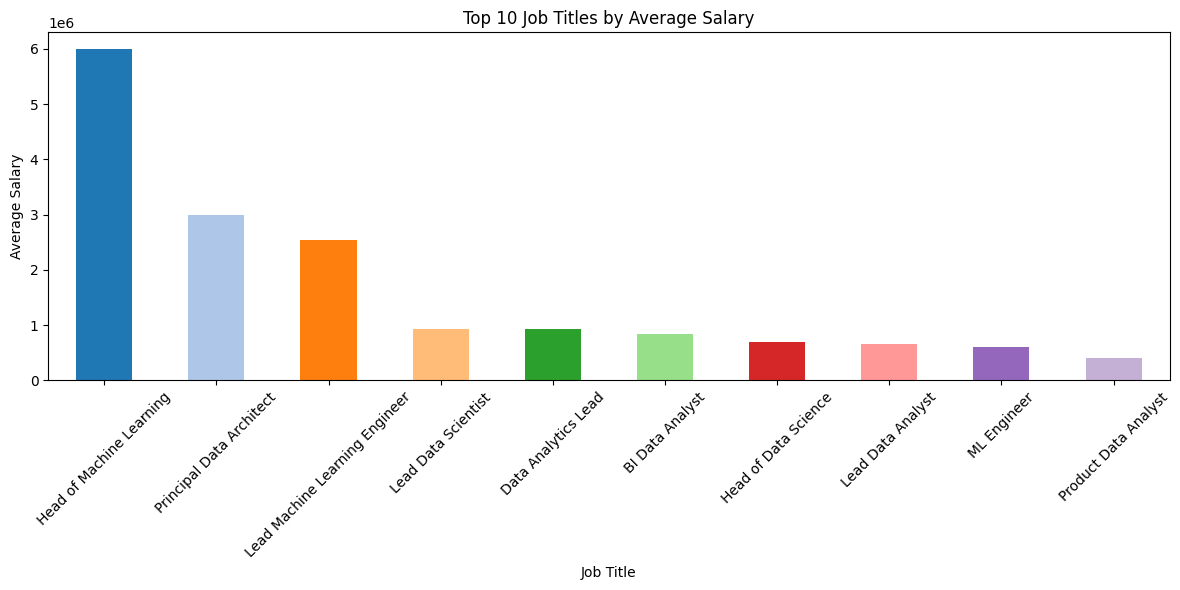

In [10]:
agent.chat('Plot a bar chart showing top 10 job titles, using different colors for each bar')

'/Users/mlim/Projects/mlim1972/llm-test/exports/charts/temp_chart.png'

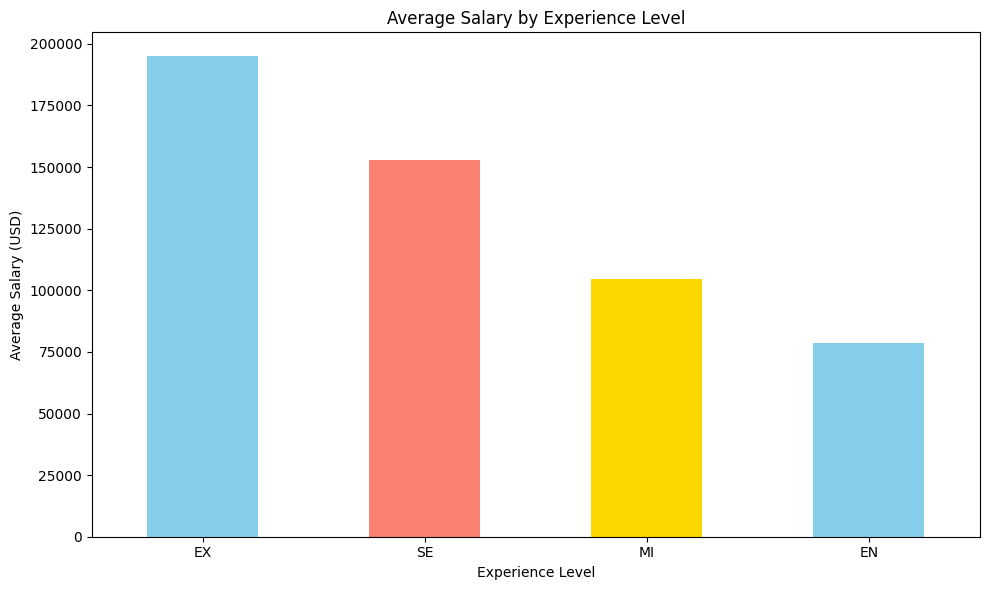

In [11]:
agent.chat('Plot a bar chart showing average salary by experience level')

'/Users/mlim/Projects/mlim1972/llm-test/exports/charts/temp_chart.png'

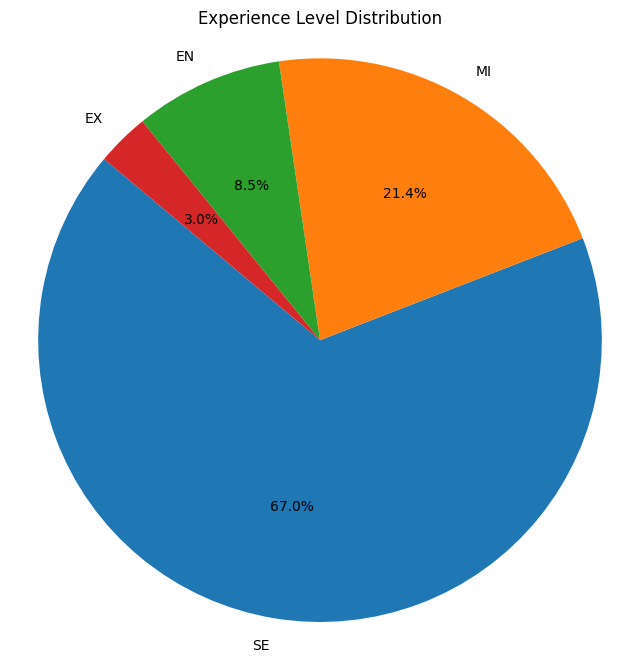

In [12]:
agent.chat('Plot a pie chart showing the experience_level distribution')
